# RNN

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [96]:
# pip install finance-datareader
import FinanceDataReader as fdr

In [97]:
# https://finance.yahoo.com

In [98]:
kakao = fdr.DataReader('035720') # Kakao
kakao

,Open,High,Low,Close,Volume,Change
Date,,,,,,
1999-11-11,999,999,999,999,12,NaN
1999-11-12,1115,1115,1115,1115,140,0.116116
1999-11-15,1249,1249,1249,1249,405,0.120179
1999-11-16,1396,1396,1396,1396,214,0.117694
1999-11-17,1561,1561,1561,1561,191,0.118195
...,...,...,...,...,...,...
2023-11-01,38000,38300,37450,37600,1272093,-0.005291
2023-11-02,38000,38600,37900,38550,1529650,0.025266
2023-11-03,39250,41550,38900,41300,3675484,0.071336


In [99]:
apple = fdr.DataReader('AAPL') # Apple
apple

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099449,469033600
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094261,175884800
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087343,105728000
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089504,86441600
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092099,73449600
...,...,...,...,...,...,...
2023-10-31,169.350006,170.899994,167.899994,170.770004,170.770004,44846000
2023-11-01,171.000000,174.229996,170.119995,173.970001,173.970001,56934900
2023-11-02,175.520004,177.779999,175.460007,177.570007,177.570007,77334800


In [100]:
fdr.DataReader('AAPL','1981','1982') # 기간 설정 가능
fdr.DataReader('AAPL','1981-01-01','1982-10-31')

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1981-01-02,0.154018,0.155134,0.154018,0.154018,0.119340,21660800
1981-01-05,0.151228,0.151228,0.150670,0.150670,0.116746,35728000
1981-01-06,0.144531,0.144531,0.143973,0.143973,0.111556,45158400
1981-01-07,0.138393,0.138393,0.137835,0.137835,0.106800,55686400
1981-01-08,0.135603,0.135603,0.135045,0.135045,0.104639,39827200
...,...,...,...,...,...,...
1982-10-25,0.115513,0.116071,0.108259,0.108817,0.084316,184934400
1982-10-26,0.108817,0.109933,0.103795,0.109375,0.084748,167753600
1982-10-27,0.109375,0.112723,0.109375,0.112165,0.086910,191161600


In [101]:
kakao.index

DatetimeIndex(['1999-11-11', '1999-11-12', '1999-11-15', '1999-11-16',
               '1999-11-17', '1999-11-18', '1999-11-19', '1999-11-22',
               '1999-11-23', '1999-11-24',
               ...
               '2023-10-25', '2023-10-26', '2023-10-27', '2023-10-30',
               '2023-10-31', '2023-11-01', '2023-11-02', '2023-11-03',
               '2023-11-06', '2023-11-07'],
              dtype='datetime64[ns]', name='Date', length=5921, freq=None)

In [102]:
kakao['year'] = kakao.index.year
kakao['month'] = kakao.index.month
kakao['day'] = kakao.index.day
kakao

,Open,High,Low,Close,Volume,Change,year,month,day
Date,,,,,,,,,
1999-11-11,999,999,999,999,12,NaN,1999,11,11
1999-11-12,1115,1115,1115,1115,140,0.116116,1999,11,12
1999-11-15,1249,1249,1249,1249,405,0.120179,1999,11,15
1999-11-16,1396,1396,1396,1396,214,0.117694,1999,11,16
1999-11-17,1561,1561,1561,1561,191,0.118195,1999,11,17
...,...,...,...,...,...,...,...,...,...
2023-11-01,38000,38300,37450,37600,1272093,-0.005291,2023,11,1
2023-11-02,38000,38600,37900,38550,1529650,0.025266,2023,11,2
2023-11-03,39250,41550,38900,41300,3675484,0.071336,2023,11,3


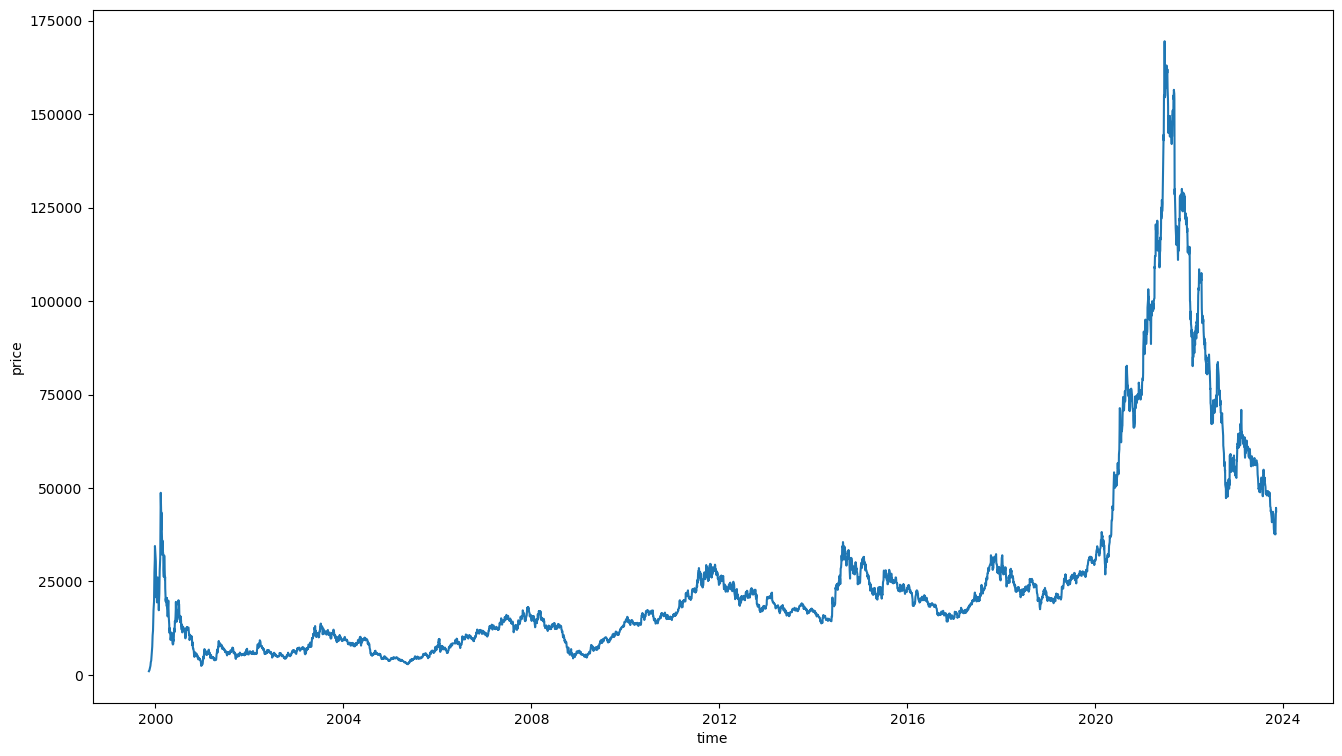

In [103]:
plt.figure(figsize=(16,9))
sns.lineplot(y = kakao['Close'], x = kakao.index)
plt.xlabel('time')
plt.ylabel('price')
plt.show()

In [104]:
ts=[['2000', '2010'],
    ['2010', '2015'],
    ['2015', '2020'],
    ['2020', '2023']]

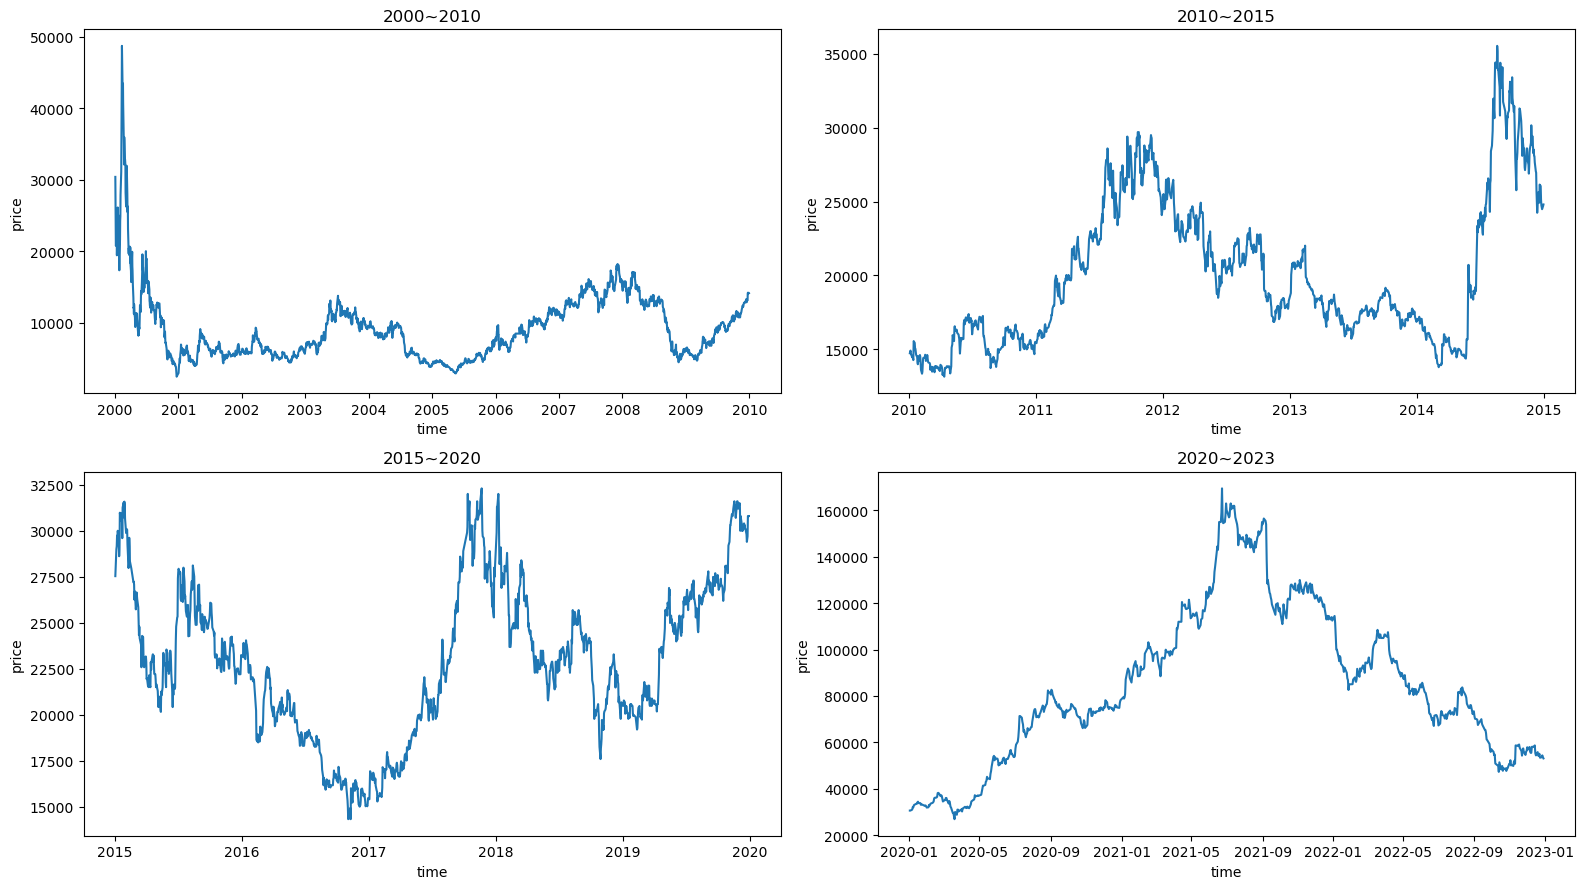

In [105]:
fig , axes = plt.subplots(2,2)
fig.set_size_inches(16,9)
for i in range(4):
    ax = axes[i//2, i%2]
    df = kakao.loc[(kakao.index > ts[i][0]) & (kakao.index <ts[i][1])]
    sns.lineplot(y=df['Close'], x=df.index, ax=ax)
    ax.set_title(f'{ts[i][0]}~{ts[i][1]}')
    ax.set_xlabel('time')
    ax.set_ylabel('price')
plt.tight_layout()

In [107]:
from sklearn.preprocessing import MinMaxScaler

In [108]:
scaler  = MinMaxScaler()

In [111]:
scaled = scaler.fit_transform(kakao[cols])
scaled

array([[5.80813953e-03, 5.77456647e-03, 6.20496894e-03, 0.00000000e+00,
        6.35083673e-07],
       [6.48255814e-03, 6.44508671e-03, 6.92546584e-03, 6.88423214e-04,
        7.40930952e-06],
       [7.26162791e-03, 7.21965318e-03, 7.75776398e-03, 1.48367072e-03,
        2.14340740e-05],
       ...,
       [2.28197674e-01, 2.40173410e-01, 2.41614907e-01, 2.39173655e-01,
        1.94519990e-01],
       [2.50000000e-01, 2.58381503e-01, 2.62732919e-01, 2.59351577e-01,
        2.57792688e-01],
       [2.59883721e-01, 2.58670520e-01, 2.66149068e-01, 2.53713628e-01,
        1.06836686e-01]])

In [112]:
scaler = MinMaxScaler()
cols = ['Open', 'High', 'Low', 'Close', 'Volume']
df = pd.DataFrame(scaled, columns=cols)
df

,Open,High,Low,Close,Volume
0,0.005808,0.005775,0.006205,0.000000,6.350837e-07
1,0.006483,0.006445,0.006925,0.000688,7.409310e-06
2,0.007262,0.007220,0.007758,0.001484,2.143407e-05
3,0.008116,0.008069,0.008671,0.002356,1.132566e-05
4,0.009076,0.009023,0.009696,0.003335,1.010842e-05
...,...,...,...,...,...
5916,0.220930,0.221387,0.232609,0.217215,6.732379e-02
5917,0.220930,0.223121,0.235404,0.222853,8.095465e-02
5918,0.228198,0.240173,0.241615,0.239174,1.945200e-01
5919,0.250000,0.258382,0.262733,0.259352,2.577927e-01


In [113]:
from sklearn.model_selection import train_test_split

In [114]:
xtrain, xtest, ytrain, ytest=train_test_split(df.drop('Close',1), df['Close'],
                                              test_size=0.2, random_state=0, shuffle=False )
# shuffle = False 시계열 데이터
# train data : 4736건
# test data : 1185건 

In [119]:
def make_dataset(data, label, window_size=20):
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size): # 4736-20 = 4716 -> i = range(0,4715)
        feature_list.append(np.array(data.iloc[i:i+window_size]))
        label_list.append(np.array(label.iloc[i+window_size]))
    return np.array(feature_list), np.array(label_list)

In [120]:
xtrain, ytrain = make_dataset(xtrain, ytrain, 20)

In [124]:
xtrain # [20,4] = 1window
# [4716,[[20,4]]

array([[[5.80813953e-03, 5.77456647e-03, 6.20496894e-03, 6.35083673e-07],
        [6.48255814e-03, 6.44508671e-03, 6.92546584e-03, 7.40930952e-06],
        [7.26162791e-03, 7.21965318e-03, 7.75776398e-03, 2.14340740e-05],
        ...,
        [3.92151163e-02, 3.89884393e-02, 4.18944099e-02, 1.20612974e-04],
        [4.38837209e-02, 4.36300578e-02, 4.68819876e-02, 9.83321221e-05],
        [4.91279070e-02, 4.88439306e-02, 5.24844720e-02, 2.80495289e-05]],

       [[6.48255814e-03, 6.44508671e-03, 6.92546584e-03, 7.40930952e-06],
        [7.26162791e-03, 7.21965318e-03, 7.75776398e-03, 2.14340740e-05],
        [8.11627907e-03, 8.06936416e-03, 8.67080745e-03, 1.13256588e-05],
        ...,
        [4.38837209e-02, 4.36300578e-02, 4.68819876e-02, 9.83321221e-05],
        [4.91279070e-02, 4.88439306e-02, 5.24844720e-02, 2.80495289e-05],
        [5.49883721e-02, 5.46705202e-02, 5.87453416e-02, 1.60358628e-05]],

       [[7.26162791e-03, 7.21965318e-03, 7.75776398e-03, 2.14340740e-05],
        

In [127]:
ytrain.shape # (4716,)
ytrain = ytrain.reshape(ytrain.shape[0],1)
ytrain.shape # (4716,1)

(4716, 1)

In [130]:
xtest, ytest = make_dataset(xtest, ytest, 20)

In [131]:
ytest.shape # (1165,)
ytest = ytest.reshape(ytest.shape[0],1)
ytest.shape # (1165,1)

(1165, 1)

In [132]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import LSTM

In [133]:
model = Sequential()

In [140]:
model.add(LSTM(16, input_shape = (xtrain.shape[1],xtrain.shape[2]),
            activation = 'relu',
            return_sequences = False
              ))

In [141]:
model.add(Dense(1)) # activation = 'linear'(default)

In [142]:
model.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='val_loss', patience=5)
checkpoint = ModelCheckpoint('tmp_checkpoint.h5', monitor='val_loss', 
                             verbose=1, save_best_only=True, mode='auto')

In [148]:
xtrain, x_valid, ytrain, y_valid = train_test_split(xtrain, ytrain, test_size=0.2)

In [149]:
history = model.fit(xtrain, ytrain, 
                    epochs=200, 
                    batch_size=16,
                    validation_data=(x_valid, y_valid), 
                    callbacks=[early_stop, checkpoint])

Epoch 1/200
227/236 [===========================>..] - ETA: 0s - loss: 0.0010
Epoch 1: val_loss improved from inf to 0.00009, saving model to tmp_checkpoint.h5
236/236 [==============================] - 2s 5ms/step - loss: 9.8827e-04 - val_loss: 8.7720e-05
Epoch 2/200
235/236 [============================>.] - ETA: 0s - loss: 6.4340e-05
Epoch 2: val_loss improved from 0.00009 to 0.00006, saving model to tmp_checkpoint.h5
236/236 [==============================] - 1s 5ms/step - loss: 6.4211e-05 - val_loss: 5.7371e-05
Epoch 3/200
235/236 [============================>.] - ETA: 0s - loss: 5.3370e-05
Epoch 3: val_loss improved from 0.00006 to 0.00005, saving model to tmp_checkpoint.h5
236/236 [==============================] - 1s 5ms/step - loss: 5.3286e-05 - val_loss: 5.0029e-05
Epoch 4/200
224/236 [===========================>..] - ETA: 0s - loss: 4.7860e-05
Epoch 4: val_loss improved from 0.00005 to 0.00005, saving model to tmp_checkpoint.h5
236/236 [==============================] - 1s

In [151]:
model.load_weights('tmp_checkpoint.h5')

In [152]:
pred = model.predict(xtest)
pred

37/37 [==============================] - 0s 2ms/step


array([[0.11338352],
       [0.11326995],
       [0.11300622],
       ...,
       [0.21611327],
       [0.22670324],
       [0.24368669]], dtype=float32)

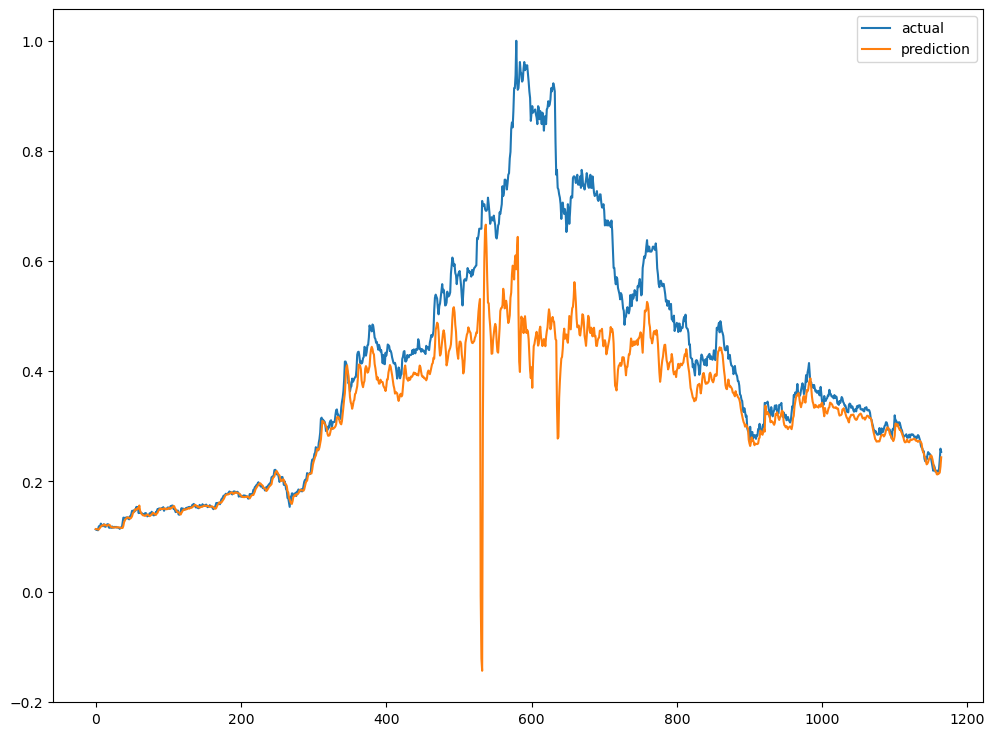

In [153]:
plt.figure(figsize=(12, 9))
plt.plot(ytest, label='actual')
plt.plot(pred, label='prediction')
plt.legend()
plt.show()

In [155]:
pred

array([[0.11338352],
       [0.11326995],
       [0.11300622],
       ...,
       [0.21611327],
       [0.22670324],
       [0.24368669]], dtype=float32)

In [ ]:
scaler.inverse_transform(pred)

In [115]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN

model = Sequential()
model.add(SimpleRNN(3, input_shape=(2,10)))
# model.add(SimpleRNN(3, input_length=2, input_dim=10))와 동일함.
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_2 (SimpleRNN)    (None, 3)                 42        
                                                                 
Total params: 42 (168.00 Byte)
Trainable params: 42 (168.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [116]:
import numpy as np

timesteps = 10
input_dim = 4
hidden_units = 8

# 입력에 해당되는 2D 텐서
inputs = np.random.random((timesteps, input_dim))

# 초기 은닉 상태는 0(벡터)로 초기화
hidden_state_t = np.zeros((hidden_units,)) 

print('초기 은닉 상태 :',hidden_state_t)

초기 은닉 상태 : [0. 0. 0. 0. 0. 0. 0. 0.]


In [117]:
inputs

array([[0.37008692, 0.27776873, 0.8943967 , 0.0510087 ],
       [0.41076522, 0.36411288, 0.63008759, 0.88209183],
       [0.75474111, 0.64057854, 0.47715392, 0.85962512],
       [0.56560371, 0.45102631, 0.81056064, 0.06843208],
       [0.19392224, 0.20776454, 0.44460769, 0.34167308],
       [0.13973807, 0.44375132, 0.93270769, 0.51340078],
       [0.36219447, 0.59037019, 0.71899995, 0.53804238],
       [0.24444924, 0.10410962, 0.58253406, 0.81368897],
       [0.37190553, 0.75341739, 0.9736894 , 0.12618639],
       [0.01797837, 0.03573466, 0.53006609, 0.77621021]])

In [118]:
Wx = np.random.random((hidden_units, input_dim))  # (8, 4)크기의 2D 텐서 생성. 입력에 대한 가중치.
Wh = np.random.random((hidden_units, hidden_units)) # (8, 8)크기의 2D 텐서 생성. 은닉 상태에 대한 가중치.
b = np.random.random((hidden_units,)) # (8,)크기의 1D 텐서 생성. 이 값은 편향(bias).

print('가중치 Wx의 크기(shape) :',np.shape(Wx))
print('가중치 Wh의 크기(shape) :',np.shape(Wh))
print('편향의 크기(shape) :',np.shape(b))

가중치 Wx의 크기(shape) : (8, 4)
가중치 Wh의 크기(shape) : (8, 8)
편향의 크기(shape) : (8,)


In [4]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

In [5]:
text = """경마장에 있는 말이 뛰고 있다\n
그의 말이 법이다\n
가는 말이 고와야 오는 말이 곱다\n"""

In [6]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts([text])

In [7]:
vocab_size = len(tokenizer.word_index) + 1
print('단어 집합의 크기 : %d'% vocab_size)

단어 집합의 크기 : 12


In [8]:
tokenizer.index_word

{1: '말이',
 2: '경마장에',
 3: '있는',
 4: '뛰고',
 5: '있다',
 6: '그의',
 7: '법이다',
 8: '가는',
 9: '고와야',
 10: '오는',
 11: '곱다'}

In [11]:
tokenizer.texts_to_sequences(['경마장에 있는 말이 뛰고 있다'])[0]

[2, 3, 1, 4, 5]

In [9]:
sequences = list()
for line in text.split('\n'): # 줄바꿈 문자를 기준으로 문장 토큰화
    encoded = tokenizer.texts_to_sequences([line])[0] # word_index로 변환
    for i in range(1, len(encoded)): # [2, 3, 1, 4, 5] -> range(1,5)
        sequence = encoded[:i+1] 
        sequences.append(sequence) # [[2,3],[2,3,1],[2,3,1,4],[2,3,1,4,5]]

print('학습에 사용할 샘플의 개수: %d' % len(sequences))

학습에 사용할 샘플의 개수: 11


In [12]:
max_len = max(len(l) for l in sequences) # 모든 샘플에서 길이가 가장 긴 샘플의 길이 출력
print('샘플의 최대 길이 : {}'.format(max_len))

샘플의 최대 길이 : 6


In [26]:
[[2, 3], [2, 3, 1], [2, 3, 1, 4], [2, 3, 1, 4, 5], [6, 1], [6, 1, 7], [8, 1], [8, 1, 9], [8, 1, 9, 10], [8, 1, 9, 10, 1], [8, 1, 9, 10, 1, 11]]

[[2, 3],
 [2, 3, 1],
 [2, 3, 1, 4],
 [2, 3, 1, 4, 5],
 [6, 1],
 [6, 1, 7],
 [8, 1],
 [8, 1, 9],
 [8, 1, 9, 10],
 [8, 1, 9, 10, 1],
 [8, 1, 9, 10, 1, 11]]

In [27]:
max_len = max(len(l) for l in sequences) # 모든 샘플에서 길이가 가장 긴 샘플의 길이 출력
print('샘플의 최대 길이 : {}'.format(max_len))

샘플의 최대 길이 : 6


In [28]:
sequences = pad_sequences(sequences, maxlen=max_len, padding='pre')

In [29]:
print(sequences)

[[ 0  0  0  0  2  3]
 [ 0  0  0  2  3  1]
 [ 0  0  2  3  1  4]
 [ 0  2  3  1  4  5]
 [ 0  0  0  0  6  1]
 [ 0  0  0  6  1  7]
 [ 0  0  0  0  8  1]
 [ 0  0  0  8  1  9]
 [ 0  0  8  1  9 10]
 [ 0  8  1  9 10  1]
 [ 8  1  9 10  1 11]]


In [168]:
sequences = np.array(sequences)
X = sequences[:,:-1]
y = sequences[:,-1]

In [31]:
X

array([[ 0,  0,  0,  0,  2],
       [ 0,  0,  0,  2,  3],
       [ 0,  0,  2,  3,  1],
       [ 0,  2,  3,  1,  4],
       [ 0,  0,  0,  0,  6],
       [ 0,  0,  0,  6,  1],
       [ 0,  0,  0,  0,  8],
       [ 0,  0,  0,  8,  1],
       [ 0,  0,  8,  1,  9],
       [ 0,  8,  1,  9, 10],
       [ 8,  1,  9, 10,  1]])

In [32]:
y = to_categorical(y, num_classes=vocab_size)
y

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, SimpleRNN

In [34]:
embedding_dim = 10
# 임베딩 차원 : 10차원
# 임베딩? 단어를 벡터공간에 표현하는 것
# 임베딩 벡터 공간 : 11차원 (단어의 종류 개수)
hidden_units = 32

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
# 12차원 데이터를 10차원 공간 데이터로 표현해라.
model.add(SimpleRNN(hidden_units))
model.add(Dense(vocab_size, activation='softmax')) # 확률 값
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X, y, epochs=200, verbose=2)
# 임베딩은 차원을 줄이기위한 목적
# 이 예시는 적절 하진 않다.
# vocab_size가 훨씬 큰 수에서 의미가 있다.

Epoch 1/200
1/1 - 1s - loss: 2.4758 - accuracy: 0.0000e+00 - 927ms/epoch - 927ms/step
Epoch 2/200
1/1 - 0s - loss: 2.4615 - accuracy: 0.0000e+00 - 3ms/epoch - 3ms/step
Epoch 3/200
1/1 - 0s - loss: 2.4467 - accuracy: 0.1818 - 4ms/epoch - 4ms/step
Epoch 4/200
1/1 - 0s - loss: 2.4315 - accuracy: 0.1818 - 3ms/epoch - 3ms/step
Epoch 5/200
1/1 - 0s - loss: 2.4157 - accuracy: 0.2727 - 3ms/epoch - 3ms/step
Epoch 6/200
1/1 - 0s - loss: 2.3992 - accuracy: 0.3636 - 4ms/epoch - 4ms/step
Epoch 7/200
1/1 - 0s - loss: 2.3820 - accuracy: 0.3636 - 4ms/epoch - 4ms/step
Epoch 8/200
1/1 - 0s - loss: 2.3640 - accuracy: 0.3636 - 3ms/epoch - 3ms/step
Epoch 9/200
1/1 - 0s - loss: 2.3451 - accuracy: 0.3636 - 3ms/epoch - 3ms/step
Epoch 10/200
1/1 - 0s - loss: 2.3253 - accuracy: 0.3636 - 3ms/epoch - 3ms/step
Epoch 11/200
1/1 - 0s - loss: 2.3045 - accuracy: 0.3636 - 4ms/epoch - 4ms/step
Epoch 12/200
1/1 - 0s - loss: 2.2828 - accuracy: 0.3636 - 3ms/epoch - 3ms/step
Epoch 13/200
1/1 - 0s - loss: 2.2600 - accuracy: 

Epoch 105/200
1/1 - 0s - loss: 0.6173 - accuracy: 0.9091 - 4ms/epoch - 4ms/step
Epoch 106/200
1/1 - 0s - loss: 0.6069 - accuracy: 0.9091 - 3ms/epoch - 3ms/step
Epoch 107/200
1/1 - 0s - loss: 0.5967 - accuracy: 0.9091 - 3ms/epoch - 3ms/step
Epoch 108/200
1/1 - 0s - loss: 0.5866 - accuracy: 0.9091 - 3ms/epoch - 3ms/step
Epoch 109/200
1/1 - 0s - loss: 0.5768 - accuracy: 0.9091 - 3ms/epoch - 3ms/step
Epoch 110/200
1/1 - 0s - loss: 0.5671 - accuracy: 0.9091 - 4ms/epoch - 4ms/step
Epoch 111/200
1/1 - 0s - loss: 0.5576 - accuracy: 0.9091 - 3ms/epoch - 3ms/step
Epoch 112/200
1/1 - 0s - loss: 0.5483 - accuracy: 0.9091 - 3ms/epoch - 3ms/step
Epoch 113/200
1/1 - 0s - loss: 0.5391 - accuracy: 0.9091 - 3ms/epoch - 3ms/step
Epoch 114/200
1/1 - 0s - loss: 0.5301 - accuracy: 0.9091 - 3ms/epoch - 3ms/step
Epoch 115/200
1/1 - 0s - loss: 0.5213 - accuracy: 0.9091 - 3ms/epoch - 3ms/step
Epoch 116/200
1/1 - 0s - loss: 0.5126 - accuracy: 0.9091 - 3ms/epoch - 3ms/step
Epoch 117/200
1/1 - 0s - loss: 0.5041 - 

In [35]:
def sentence_generation(model, tokenizer, current_word, n): # 모델, 토크나이저, 현재 단어, 반복할 횟수
    init_word = current_word
    sentence = ''

    # n번 반복
    for _ in range(n):
        # 현재 단어에 대한 정수 인코딩과 패딩
        encoded = tokenizer.texts_to_sequences([current_word])[0] # '경마장에' -> [2]
        encoded = pad_sequences([encoded], maxlen=5, padding='pre') # [2] -> [[0 0 0 0 2]]
        # 입력한 X(현재 단어)에 대해서 Y를 예측하고 Y(예측한 단어)를 result에 저장.
        result = model.predict(encoded, verbose=0)
        result = np.argmax(result, axis=1)

        for word, index in tokenizer.word_index.items(): 
            # 만약 예측한 단어와 인덱스와 동일한 단어가 있다면 break
            if index == result:
                break

        # 현재 단어 + ' ' + 예측 단어를 현재 단어로 변경
        current_word = current_word + ' '  + word

        # 예측 단어를 문장에 저장
        sentence = sentence + ' ' + word

    sentence = init_word + sentence
    return sentence

In [36]:
print(sentence_generation(model, tokenizer, '경마장에', 4))

경마장에 있는 말이 뛰고 있다


In [37]:
print(sentence_generation(model, tokenizer, '그의', 3))

그의 말이 법이다 말이


In [169]:
text = '''

화려한 도시를 그리며 찾아왔네

그 곳은 춥고도 험한 곳

여기저기 헤매다 초라한 문턱에서

뜨거운 눈물을 먹는다

머나먼 길을 찾아 여기에 꿈을 찾아 여기에

괴롭고도 험한 이 길을 왔는데

이 세상 어디가 숲인지 어디가 늪인지

그 누구도 말을 않네

사람들은 저마다 고향을 찾아가네

나는 지금 홀로 남아서

빌딩 속을 헤매이다 초라한 골목에서

뜨거운 눈물을 먹는다

저기 저 별은 나의 마음을 알까 나의 꿈을 알까

괴로울 땐 슬픈 노래를 부른다

슬퍼질 땐 차라리 나 홀로 눈을 감고 싶어

고향의 향기 들으면서

저기 저 별은 나의 마음 알까 나의 꿈을 알까

괴로울 땐 슬픈 노래를 부른다

이 세상 어디가 숲인지 어디가 늪인지

그 누구도 말을 않네

슬퍼질 땐 차라리 나 홀로 눈을 감고 싶어

고향의 향기 들으면서

고향의 향기 들으면서
'''

In [170]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts([text])

In [171]:
vocab_size = len(tokenizer.word_index) + 1
print('단어 집합의 크기 : %d'% vocab_size)

단어 집합의 크기 : 65


In [172]:
tokenizer.index_word

{1: '어디가',
 2: '나의',
 3: '알까',
 4: '땐',
 5: '그',
 6: '꿈을',
 7: '이',
 8: '홀로',
 9: '고향의',
 10: '향기',
 11: '들으면서',
 12: '험한',
 13: '초라한',
 14: '뜨거운',
 15: '눈물을',
 16: '먹는다',
 17: '길을',
 18: '찾아',
 19: '여기에',
 20: '세상',
 21: '숲인지',
 22: '늪인지',
 23: '누구도',
 24: '말을',
 25: '않네',
 26: '저기',
 27: '저',
 28: '별은',
 29: '괴로울',
 30: '슬픈',
 31: '노래를',
 32: '부른다',
 33: '슬퍼질',
 34: '차라리',
 35: '나',
 36: '눈을',
 37: '감고',
 38: '싶어',
 39: '화려한',
 40: '도시를',
 41: '그리며',
 42: '찾아왔네',
 43: '곳은',
 44: '춥고도',
 45: '곳',
 46: '여기저기',
 47: '헤매다',
 48: '문턱에서',
 49: '머나먼',
 50: '괴롭고도',
 51: '왔는데',
 52: '사람들은',
 53: '저마다',
 54: '고향을',
 55: '찾아가네',
 56: '나는',
 57: '지금',
 58: '남아서',
 59: '빌딩',
 60: '속을',
 61: '헤매이다',
 62: '골목에서',
 63: '마음을',
 64: '마음'}

In [173]:
sequences = list()
for line in text.split('\n'): 
    encoded = tokenizer.texts_to_sequences([line])[0] 
    for i in range(1, len(encoded)):
        sequence = encoded[:i+1] 
        sequences.append(sequence) 

print('학습에 사용할 샘플의 개수: %d' % len(sequences))

학습에 사용할 샘플의 개수: 94


In [174]:
max_len = max(len(l) for l in sequences)
print('샘플의 최대 길이 : {}'.format(max_len))

샘플의 최대 길이 : 9


In [175]:
sequences = pad_sequences(sequences, maxlen=max_len, padding='pre')

In [176]:
print(sequences)

[[ 0  0  0  0  0  0  0 39 40]
 [ 0  0  0  0  0  0 39 40 41]
 [ 0  0  0  0  0 39 40 41 42]
 [ 0  0  0  0  0  0  0  5 43]
 [ 0  0  0  0  0  0  5 43 44]
 [ 0  0  0  0  0  5 43 44 12]
 [ 0  0  0  0  5 43 44 12 45]
 [ 0  0  0  0  0  0  0 46 47]
 [ 0  0  0  0  0  0 46 47 13]
 [ 0  0  0  0  0 46 47 13 48]
 [ 0  0  0  0  0  0  0 14 15]
 [ 0  0  0  0  0  0 14 15 16]
 [ 0  0  0  0  0  0  0 49 17]
 [ 0  0  0  0  0  0 49 17 18]
 [ 0  0  0  0  0 49 17 18 19]
 [ 0  0  0  0 49 17 18 19  6]
 [ 0  0  0 49 17 18 19  6 18]
 [ 0  0 49 17 18 19  6 18 19]
 [ 0  0  0  0  0  0  0 50 12]
 [ 0  0  0  0  0  0 50 12  7]
 [ 0  0  0  0  0 50 12  7 17]
 [ 0  0  0  0 50 12  7 17 51]
 [ 0  0  0  0  0  0  0  7 20]
 [ 0  0  0  0  0  0  7 20  1]
 [ 0  0  0  0  0  7 20  1 21]
 [ 0  0  0  0  7 20  1 21  1]
 [ 0  0  0  7 20  1 21  1 22]
 [ 0  0  0  0  0  0  0  5 23]
 [ 0  0  0  0  0  0  5 23 24]
 [ 0  0  0  0  0  5 23 24 25]
 [ 0  0  0  0  0  0  0 52 53]
 [ 0  0  0  0  0  0 52 53 54]
 [ 0  0  0  0  0 52 53 54 55]
 [ 0  0  0

In [177]:
sequences = np.array(sequences)
X = sequences[:,:-1]
y = sequences[:,-1]

In [178]:
y = to_categorical(y, num_classes=vocab_size)

In [179]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, SimpleRNN

In [180]:
embedding_dim = 10

hidden_units = 32

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))

model.add(SimpleRNN(hidden_units))
model.add(Dense(vocab_size, activation='softmax')) 
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X, y, epochs=200, verbose=2)

Epoch 1/200
3/3 - 1s - loss: 4.1687 - accuracy: 0.0213 - 840ms/epoch - 280ms/step
Epoch 2/200
3/3 - 0s - loss: 4.1521 - accuracy: 0.0426 - 9ms/epoch - 3ms/step
Epoch 3/200
3/3 - 0s - loss: 4.1368 - accuracy: 0.0745 - 8ms/epoch - 3ms/step
Epoch 4/200
3/3 - 0s - loss: 4.1224 - accuracy: 0.1064 - 7ms/epoch - 2ms/step
Epoch 5/200
3/3 - 0s - loss: 4.1070 - accuracy: 0.1064 - 7ms/epoch - 2ms/step
Epoch 6/200
3/3 - 0s - loss: 4.0890 - accuracy: 0.1064 - 7ms/epoch - 2ms/step
Epoch 7/200
3/3 - 0s - loss: 4.0670 - accuracy: 0.1064 - 7ms/epoch - 2ms/step
Epoch 8/200
3/3 - 0s - loss: 4.0446 - accuracy: 0.1277 - 8ms/epoch - 3ms/step
Epoch 9/200
3/3 - 0s - loss: 4.0185 - accuracy: 0.1277 - 7ms/epoch - 2ms/step
Epoch 10/200
3/3 - 0s - loss: 3.9908 - accuracy: 0.1277 - 7ms/epoch - 2ms/step
Epoch 11/200
3/3 - 0s - loss: 3.9608 - accuracy: 0.1277 - 7ms/epoch - 2ms/step
Epoch 12/200
3/3 - 0s - loss: 3.9307 - accuracy: 0.1277 - 7ms/epoch - 2ms/step
Epoch 13/200
3/3 - 0s - loss: 3.9001 - accuracy: 0.1489 -

Epoch 105/200
3/3 - 0s - loss: 1.4252 - accuracy: 0.8085 - 7ms/epoch - 2ms/step
Epoch 106/200
3/3 - 0s - loss: 1.3982 - accuracy: 0.8191 - 6ms/epoch - 2ms/step
Epoch 107/200
3/3 - 0s - loss: 1.3818 - accuracy: 0.8191 - 6ms/epoch - 2ms/step
Epoch 108/200
3/3 - 0s - loss: 1.3621 - accuracy: 0.8191 - 7ms/epoch - 2ms/step
Epoch 109/200
3/3 - 0s - loss: 1.3411 - accuracy: 0.8191 - 7ms/epoch - 2ms/step
Epoch 110/200
3/3 - 0s - loss: 1.3229 - accuracy: 0.8191 - 6ms/epoch - 2ms/step
Epoch 111/200
3/3 - 0s - loss: 1.3059 - accuracy: 0.8191 - 7ms/epoch - 2ms/step
Epoch 112/200
3/3 - 0s - loss: 1.2846 - accuracy: 0.8298 - 6ms/epoch - 2ms/step
Epoch 113/200
3/3 - 0s - loss: 1.2690 - accuracy: 0.8298 - 7ms/epoch - 2ms/step
Epoch 114/200
3/3 - 0s - loss: 1.2619 - accuracy: 0.8404 - 6ms/epoch - 2ms/step
Epoch 115/200
3/3 - 0s - loss: 1.2343 - accuracy: 0.8298 - 7ms/epoch - 2ms/step
Epoch 116/200
3/3 - 0s - loss: 1.2178 - accuracy: 0.8404 - 6ms/epoch - 2ms/step
Epoch 117/200
3/3 - 0s - loss: 1.1974 - 

In [181]:
def sentence_generation(model, tokenizer, current_word, n): 
    init_word = current_word
    sentence = ''


    for _ in range(n):
     
        encoded = tokenizer.texts_to_sequences([current_word])[0] 
        encoded = pad_sequences([encoded], maxlen=5, padding='pre') 

        result = model.predict(encoded, verbose=0)
        result = np.argmax(result, axis=1)

        for word, index in tokenizer.word_index.items(): 
 
            if index == result:
                break
        current_word = current_word + ' '  + word

        sentence = sentence + ' ' + word

    sentence = init_word + sentence
    return sentence

In [182]:
print(sentence_generation(model, tokenizer, '화려한', 3))

화려한 도시를 그리며 찾아왔네


In [183]:
print(sentence_generation(model, tokenizer, '고향의', 2))

고향의 향기 들으면서


In [40]:
import pandas as pd
import numpy as np
from string import punctuation

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

In [73]:
df=pd.read_csv('ArticlesApril2018.csv') # 뉴욕타임즈 기사 from kaggle
df.head()

,articleID,articleWordCount,byline,documentType,headline,keywords,multimedia,newDesk,printPage,pubDate,sectionName,snippet,source,typeOfMaterial,webURL
0,5adf6684068401528a2aa69b,781,By JOHN BRANCH,article,Former N.F.L. Cheerleaders’ Settlement Offer: ...,"['Workplace Hazards and Violations', 'Football...",68,Sports,0,2018-04-24 17:16:49,Pro Football,"“I understand that they could meet with us, pa...",The New York Times,News,https://www.nytimes.com/2018/04/24/sports/foot...
1,5adf653f068401528a2aa697,656,By LISA FRIEDMAN,article,E.P.A. to Unveil a New Rule. Its Effect: Less ...,"['Environmental Protection Agency', 'Pruitt, S...",68,Climate,0,2018-04-24 17:11:21,Unknown,The agency plans to publish a new regulation T...,The New York Times,News,https://www.nytimes.com/2018/04/24/climate/epa...
2,5adf4626068401528a2aa628,2427,By PETE WELLS,article,"The New Noma, Explained","['Restaurants', 'Noma (Copenhagen, Restaurant)...",66,Dining,0,2018-04-24 14:58:44,Unknown,What’s it like to eat at the second incarnatio...,The New York Times,News,https://www.nytimes.com/2018/04/24/dining/noma...
3,5adf40d2068401528a2aa619,626,By JULIE HIRSCHFELD DAVIS and PETER BAKER,article,Unknown,"['Macron, Emmanuel (1977- )', 'Trump, Donald J...",68,Washington,0,2018-04-24 14:35:57,Europe,President Trump welcomed President Emmanuel Ma...,The New York Times,News,https://www.nytimes.com/2018/04/24/world/europ...
4,5adf3d64068401528a2aa60f,815,By IAN AUSTEN and DAN BILEFSKY,article,Unknown,"['Toronto, Ontario, Attack (April, 2018)', 'Mu...",68,Foreign,0,2018-04-24 14:21:21,Canada,"Alek Minassian, 25, a resident of Toronto’s Ri...",The New York Times,News,https://www.nytimes.com/2018/04/24/world/canad...


In [74]:
print('열의 개수: ',len(df.columns))
print(df.columns)

열의 개수:  15
Index(['articleID', 'articleWordCount', 'byline', 'documentType', 'headline',
       'keywords', 'multimedia', 'newDesk', 'printPage', 'pubDate',
       'sectionName', 'snippet', 'source', 'typeOfMaterial', 'webURL'],
      dtype='object')


In [75]:
print(df['headline'].isnull().values.any()) # 한개도 결측값이 없다

False


In [76]:
headline = []
headline.extend(list(df.headline.values))
headline

['Former N.F.L. Cheerleaders’ Settlement Offer: $1 and a Meeting With Goodell',
 'E.P.A. to Unveil a New Rule. Its Effect: Less Science in Policymaking.',
 'The New Noma, Explained',
 'Unknown',
 'Unknown',
 'Unknown',
 'Unknown',
 'Unknown',
 'How a Bag of Texas Dirt  Became a Times Tradition',
 'Is School a Place for Self-Expression?',
 'Commuter Reprogramming',
 'Unknown',
 'Unknown',
 'Ford Changed Leaders, Looking for a Lift. It’s Still Looking.',
 'Romney Failed to Win at Utah Convention, But Few Believe He’s Doomed',
 'Chain Reaction',
 'He Forced the Vatican to Investigate Sex Abuse. Now He’s Meeting With Pope Francis.',
 'In Berlin, artists find a home',
 'Unknown',
 'The Right Stuff',
 'Jimmy Carter Knows What North Korea Wants',
 'The Truth Is Out There',
 'New Jersey Ruling Could Reignite Battle Over Church-State Separation',
 'Procrastinating',
 'Word + Quiz: dilatory',
 'My Life-Threatening Bout With E. Coli Food Poisoning',
 'Choosing Brexit, a Town Yearned for Its Seafa

In [77]:
print('총 샘플의 개수 : {}'.format(len(headline)))
headline = [word for word in headline if word != "Unknown"] # Unknown 지워
print('노이즈값 제거 후 샘플의 개수 : {}'.format(len(headline)))

총 샘플의 개수 : 1324
노이즈값 제거 후 샘플의 개수 : 1214


In [78]:
# 단어 소문자 통일 , 마침표 제거
def repreprocessing(raw_sentence):
    preproceseed_sentence = raw_sentence.encode("utf8").decode("ascii",'ignore')
    return ''.join(word for word in preproceseed_sentence if word not in punctuation).lower()
                                # punctuation 특수문자(!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~)
preprocessed_headline = [repreprocessing(x) for x in headline]
preprocessed_headline[:5]

['former nfl cheerleaders settlement offer 1 and a meeting with goodell',
 'epa to unveil a new rule its effect less science in policymaking',
 'the new noma explained',
 'how a bag of texas dirt  became a times tradition',
 'is school a place for selfexpression']

In [79]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(preprocessed_headline)
vocab_size = len(tokenizer.word_index) + 1
print('단어 집합의 크기 : %d' % vocab_size)

단어 집합의 크기 : 3494


In [80]:
tokenizer.word_index # 관사를 빼는 것도 생각해볼수 있을듯

{'the': 1,
 'a': 2,
 'to': 3,
 'of': 4,
 'in': 5,
 'for': 6,
 'and': 7,
 'is': 8,
 'on': 9,
 'with': 10,
 'trump': 11,
 'as': 12,
 'at': 13,
 'new': 14,
 'how': 15,
 'from': 16,
 'it': 17,
 'an': 18,
 'that': 19,
 'be': 20,
 'season': 21,
 'us': 22,
 'you': 23,
 'its': 24,
 'what': 25,
 'episode': 26,
 'can': 27,
 'your': 28,
 'not': 29,
 'he': 30,
 'now': 31,
 'his': 32,
 'are': 33,
 'teaching': 34,
 'war': 35,
 'out': 36,
 'no': 37,
 'was': 38,
 'by': 39,
 'trumps': 40,
 'has': 41,
 'over': 42,
 'may': 43,
 'into': 44,
 'why': 45,
 'more': 46,
 'we': 47,
 'who': 48,
 'about': 49,
 'recap': 50,
 'activities': 51,
 '1': 52,
 'just': 53,
 'do': 54,
 'women': 55,
 'when': 56,
 'syria': 57,
 'trade': 58,
 'i': 59,
 '2': 60,
 'or': 61,
 'will': 62,
 'this': 63,
 'have': 64,
 'president': 65,
 'but': 66,
 'home': 67,
 'up': 68,
 'long': 69,
 'one': 70,
 'off': 71,
 'facebook': 72,
 'house': 73,
 'gop': 74,
 'our': 75,
 'case': 76,
 'they': 77,
 'life': 78,
 'end': 79,
 'right': 80,
 'some':

In [81]:
sequences = list()

for sentence in preprocessed_headline:

    # 각 샘플에 대한 정수 인코딩
    encoded = tokenizer.texts_to_sequences([sentence])[0] 
    for i in range(1, len(encoded)):
        sequence = encoded[:i+1]
        sequences.append(sequence)

sequences[:11] 
# 앞은 입력 단어
# 마지막이 예측 단어

[[99, 269],
 [99, 269, 371],
 [99, 269, 371, 1115],
 [99, 269, 371, 1115, 582],
 [99, 269, 371, 1115, 582, 52],
 [99, 269, 371, 1115, 582, 52, 7],
 [99, 269, 371, 1115, 582, 52, 7, 2],
 [99, 269, 371, 1115, 582, 52, 7, 2, 372],
 [99, 269, 371, 1115, 582, 52, 7, 2, 372, 10],
 [99, 269, 371, 1115, 582, 52, 7, 2, 372, 10, 1116],
 [100, 3]]

In [82]:
index_to_word = {}
for key, value in tokenizer.word_index.items(): # 인덱스를 단어로 바꾸기 위해 index_to_word를 생성
    index_to_word[value] = key

In [83]:
index_to_word

{1: 'the',
 2: 'a',
 3: 'to',
 4: 'of',
 5: 'in',
 6: 'for',
 7: 'and',
 8: 'is',
 9: 'on',
 10: 'with',
 11: 'trump',
 12: 'as',
 13: 'at',
 14: 'new',
 15: 'how',
 16: 'from',
 17: 'it',
 18: 'an',
 19: 'that',
 20: 'be',
 21: 'season',
 22: 'us',
 23: 'you',
 24: 'its',
 25: 'what',
 26: 'episode',
 27: 'can',
 28: 'your',
 29: 'not',
 30: 'he',
 31: 'now',
 32: 'his',
 33: 'are',
 34: 'teaching',
 35: 'war',
 36: 'out',
 37: 'no',
 38: 'was',
 39: 'by',
 40: 'trumps',
 41: 'has',
 42: 'over',
 43: 'may',
 44: 'into',
 45: 'why',
 46: 'more',
 47: 'we',
 48: 'who',
 49: 'about',
 50: 'recap',
 51: 'activities',
 52: '1',
 53: 'just',
 54: 'do',
 55: 'women',
 56: 'when',
 57: 'syria',
 58: 'trade',
 59: 'i',
 60: '2',
 61: 'or',
 62: 'will',
 63: 'this',
 64: 'have',
 65: 'president',
 66: 'but',
 67: 'home',
 68: 'up',
 69: 'long',
 70: 'one',
 71: 'off',
 72: 'facebook',
 73: 'house',
 74: 'gop',
 75: 'our',
 76: 'case',
 77: 'they',
 78: 'life',
 79: 'end',
 80: 'right',
 81: 'so

In [84]:
tokenizer.word_index # 빈도 수 높을 수록 1

{'the': 1,
 'a': 2,
 'to': 3,
 'of': 4,
 'in': 5,
 'for': 6,
 'and': 7,
 'is': 8,
 'on': 9,
 'with': 10,
 'trump': 11,
 'as': 12,
 'at': 13,
 'new': 14,
 'how': 15,
 'from': 16,
 'it': 17,
 'an': 18,
 'that': 19,
 'be': 20,
 'season': 21,
 'us': 22,
 'you': 23,
 'its': 24,
 'what': 25,
 'episode': 26,
 'can': 27,
 'your': 28,
 'not': 29,
 'he': 30,
 'now': 31,
 'his': 32,
 'are': 33,
 'teaching': 34,
 'war': 35,
 'out': 36,
 'no': 37,
 'was': 38,
 'by': 39,
 'trumps': 40,
 'has': 41,
 'over': 42,
 'may': 43,
 'into': 44,
 'why': 45,
 'more': 46,
 'we': 47,
 'who': 48,
 'about': 49,
 'recap': 50,
 'activities': 51,
 '1': 52,
 'just': 53,
 'do': 54,
 'women': 55,
 'when': 56,
 'syria': 57,
 'trade': 58,
 'i': 59,
 '2': 60,
 'or': 61,
 'will': 62,
 'this': 63,
 'have': 64,
 'president': 65,
 'but': 66,
 'home': 67,
 'up': 68,
 'long': 69,
 'one': 70,
 'off': 71,
 'facebook': 72,
 'house': 73,
 'gop': 74,
 'our': 75,
 'case': 76,
 'they': 77,
 'life': 78,
 'end': 79,
 'right': 80,
 'some':

In [85]:
len(sequences)

7803

In [86]:
max_len = max(len(l) for l in sequences)
print('샘플의 최대 길이 : {}'.format(max_len))

샘플의 최대 길이 : 24


In [87]:
sequences = pad_sequences(sequences, maxlen=max_len, padding='pre')
sequences
# 앞에서 부터 23개 입력데이터  # 마지막 1개 출력 데이터

array([[   0,    0,    0, ...,    0,   99,  269],
       [   0,    0,    0, ...,   99,  269,  371],
       [   0,    0,    0, ...,  269,  371, 1115],
       ...,
       [   0,    0,    0, ...,    8, 3493,  115],
       [   0,    0,    0, ..., 3493,  115,    2],
       [   0,    0,    0, ...,  115,    2, 1025]])

In [88]:
sequences = np.array(sequences) # array형태로 해야함.
X = sequences[:,:-1]
y = sequences[:,-1]

In [89]:
vocab_size # 3494차원으로 예측
# ex) 1025 -> 00000......0010000000000...0 (전체길이 3494)

3494

In [90]:
y = to_categorical(y, num_classes=vocab_size)
y.shape 
# 7807개 훈련 문장에 대한 정답에 해당되는 7803개의 단어
# 각 단어는 2393차원으로 원핫인코딩

(7803, 3494)

In [91]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, LSTM

In [92]:
embedding_dim = 10
hidden_units = 128

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim)) # 3494차원 -> 10차원
model.add(LSTM(hidden_units)) # LSTM 셀 출력 : 128차원
model.add(Dense(vocab_size, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X, y, epochs=200, verbose=2)

Epoch 1/200
244/244 - 5s - loss: 7.6481 - accuracy: 0.0235 - 5s/epoch - 21ms/step
Epoch 2/200
244/244 - 3s - loss: 7.1177 - accuracy: 0.0293 - 3s/epoch - 12ms/step
Epoch 3/200
244/244 - 3s - loss: 6.9832 - accuracy: 0.0354 - 3s/epoch - 11ms/step
Epoch 4/200
244/244 - 3s - loss: 6.8654 - accuracy: 0.0393 - 3s/epoch - 11ms/step
Epoch 5/200
244/244 - 3s - loss: 6.7262 - accuracy: 0.0441 - 3s/epoch - 11ms/step
Epoch 6/200
244/244 - 3s - loss: 6.5658 - accuracy: 0.0463 - 3s/epoch - 11ms/step
Epoch 7/200
244/244 - 3s - loss: 6.3860 - accuracy: 0.0484 - 3s/epoch - 11ms/step
Epoch 8/200
244/244 - 3s - loss: 6.3142 - accuracy: 0.0538 - 3s/epoch - 11ms/step
Epoch 9/200
244/244 - 3s - loss: 6.0369 - accuracy: 0.0628 - 3s/epoch - 11ms/step
Epoch 10/200
244/244 - 3s - loss: 5.8552 - accuracy: 0.0661 - 3s/epoch - 11ms/step
Epoch 11/200
244/244 - 3s - loss: 5.6851 - accuracy: 0.0689 - 3s/epoch - 11ms/step
Epoch 12/200
244/244 - 3s - loss: 5.5226 - accuracy: 0.0725 - 3s/epoch - 12ms/step
Epoch 13/200


Epoch 100/200
244/244 - 3s - loss: 0.6739 - accuracy: 0.8694 - 3s/epoch - 13ms/step
Epoch 101/200
244/244 - 3s - loss: 0.6579 - accuracy: 0.8717 - 3s/epoch - 12ms/step
Epoch 102/200
244/244 - 3s - loss: 0.6491 - accuracy: 0.8717 - 3s/epoch - 13ms/step
Epoch 103/200
244/244 - 3s - loss: 0.6394 - accuracy: 0.8757 - 3s/epoch - 12ms/step
Epoch 104/200
244/244 - 3s - loss: 0.6195 - accuracy: 0.8789 - 3s/epoch - 13ms/step
Epoch 105/200
244/244 - 3s - loss: 0.6030 - accuracy: 0.8800 - 3s/epoch - 12ms/step
Epoch 106/200
244/244 - 3s - loss: 0.5893 - accuracy: 0.8849 - 3s/epoch - 13ms/step
Epoch 107/200
244/244 - 3s - loss: 0.5778 - accuracy: 0.8859 - 3s/epoch - 13ms/step
Epoch 108/200
244/244 - 3s - loss: 0.5665 - accuracy: 0.8868 - 3s/epoch - 13ms/step
Epoch 109/200
244/244 - 3s - loss: 0.5565 - accuracy: 0.8882 - 3s/epoch - 13ms/step
Epoch 110/200
244/244 - 3s - loss: 0.5461 - accuracy: 0.8909 - 3s/epoch - 13ms/step
Epoch 111/200
244/244 - 3s - loss: 0.5322 - accuracy: 0.8938 - 3s/epoch - 13

Epoch 198/200
244/244 - 3s - loss: 0.2727 - accuracy: 0.9136 - 3s/epoch - 12ms/step
Epoch 199/200
244/244 - 3s - loss: 0.2872 - accuracy: 0.9130 - 3s/epoch - 12ms/step
Epoch 200/200
244/244 - 3s - loss: 0.2741 - accuracy: 0.9149 - 3s/epoch - 12ms/step


In [93]:
def sentence_generation(model, tokenizer, current_word, n): # 모델, 토크나이저, 현재 단어, 반복할 횟수
    init_word = current_word
    sentence = ''

    # n번 반복
    for _ in range(n):
        encoded = tokenizer.texts_to_sequences([current_word])[0]
        encoded = pad_sequences([encoded], maxlen=max_len-1, padding='pre')

        # 입력한 X(현재 단어)에 대해서 y를 예측하고 y(예측한 단어)를 result에 저장.
        result = model.predict(encoded, verbose=0)
        result = np.argmax(result, axis=1)

        for word, index in tokenizer.word_index.items(): 
            # 만약 예측한 단어와 인덱스와 동일한 단어가 있다면
            if index == result:
                break

        # 현재 단어 + ' ' + 예측 단어를 현재 단어로 변경
        current_word = current_word + ' '  + word

        # 예측 단어를 문장에 저장
        sentence = sentence + ' ' + word

    sentence = init_word + sentence
    return sentence

In [94]:
print(sentence_generation(model, tokenizer, 'i', 10)) # 'i' 다음 단어 10개
print(sentence_generation(model, tokenizer, 'how', 10)) # 'how' 다음 단어 10개

i cant jump ship from facebook yet red do in it
how to serve a deranged tyrant stoically gap is the investigators
